In [1]:
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.svm import SVC

In [3]:
data = pd.read_csv('migration_Data.csv')

In [4]:
data.head()

,country_id_alpha,country_name,year,total_country_population,annual_growth_rate,country_area,population_density,total_fertility_rate,crude_birth_rate,life_expectancy_at_birth,infant_mortality_rate,crude_death_rate,net_migration_rate,migration_flag,total_migrant_population,migrant_male_population,migrant_female_population
0,AF,Afghanistan,1990,13568282,-1.928,652230,20.8,8.0000,54.44,42.19,167.73,22.50,-51.23,f,57686,32558,25128
1,AF,Afghanistan,1995,19445013,3.492,652230,29.8,8.0000,53.23,43.88,156.75,20.99,2.68,t,71522,39105,32417
2,AF,Afghanistan,2000,22461349,-1.328,652230,34.4,8.0000,51.35,45.49,146.75,19.33,-45.30,f,75917,42848,33069
3,AF,Afghanistan,2005,26332646,3.439,652230,40.4,6.3707,41.51,47.06,137.56,16.55,9.43,t,87314,49281,38033
4,AF,Afghanistan,2010,29116851,2.139,652230,44.6,5.8532,39.77,48.93,127.79,15.13,-3.25,f,102276,57726,44550


In [5]:
data.shape

(1419, 17)

In [6]:
data.isnull().sum()

country_id_alpha             7
country_name                 0
year                         0
total_country_population     0
annual_growth_rate           0
country_area                 0
population_density           0
total_fertility_rate         0
crude_birth_rate             0
life_expectancy_at_birth     0
infant_mortality_rate        0
crude_death_rate             0
net_migration_rate           0
migration_flag               0
total_migrant_population     0
migrant_male_population      0
migrant_female_population    0
dtype: int64

In [7]:
data[data['country_id_alpha'].isna()]

,country_id_alpha,country_name,year,total_country_population,annual_growth_rate,country_area,population_density,total_fertility_rate,crude_birth_rate,life_expectancy_at_birth,infant_mortality_rate,crude_death_rate,net_migration_rate,migration_flag,total_migrant_population,migrant_male_population,migrant_female_population
893,NaN,Namibia,1990,1458648,2.990,823290,1.8,5.3076,37.92,57.80,67.30,9.92,1.90,t,120641,63748,56893
894,NaN,Namibia,1995,1661348,2.461,823290,2.0,4.6200,34.98,55.88,66.92,10.53,0.16,t,115372,61310,54062
895,NaN,Namibia,2000,1877964,3.238,823290,2.3,4.0900,33.56,53.44,66.54,11.57,10.39,t,135547,73154,62393
896,NaN,Namibia,2005,2043266,1.221,823290,2.5,3.9345,32.46,52.43,59.49,12.68,-7.57,f,107347,57625,49722
897,NaN,Namibia,2010,2182968,1.399,823290,2.7,3.7277,30.65,59.93,46.17,9.57,-7.08,f,103826,55803,48023
898,NaN,Namibia,2015,2388262,2.008,823290,2.9,3.4294,28.36,63.11,37.82,8.28,0.00,t,101618,54739,46879
899,NaN,Namibia,2020,2629632,1.834,823290,3.2,3.0700,25.65,65.26,31.38,7.31,0.00,t,109391,59024,50367


In [8]:
data['country_id_alpha'].nunique()

216

In [9]:
data = data[data['country_id_alpha'].str.contains("CW|GG|JE|XK|ME|BL|MF|SX|TW")==False]

In [10]:
data['country_id_alpha'].nunique()

216

In [11]:
data.dtypes

country_id_alpha              object
country_name                  object
year                           int64
total_country_population       int64
annual_growth_rate           float64
country_area                   int64
population_density           float64
total_fertility_rate         float64
crude_birth_rate             float64
life_expectancy_at_birth     float64
infant_mortality_rate        float64
crude_death_rate             float64
net_migration_rate           float64
migration_flag                object
total_migrant_population       int64
migrant_male_population        int64
migrant_female_population      int64
dtype: object

In [12]:
data['migration_flag'].value_counts()

f    801
t    611
Name: migration_flag, dtype: int64

In [13]:
data['migration_flag'] = data['migration_flag'].replace({'t':1, 'f':0})

In [14]:
data['migration_flag'].value_counts()

0    801
1    611
Name: migration_flag, dtype: int64

In [15]:
data['year'].min()

1990

In [16]:
data['year'].max()

2020

In [17]:
data.duplicated().sum()

0

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

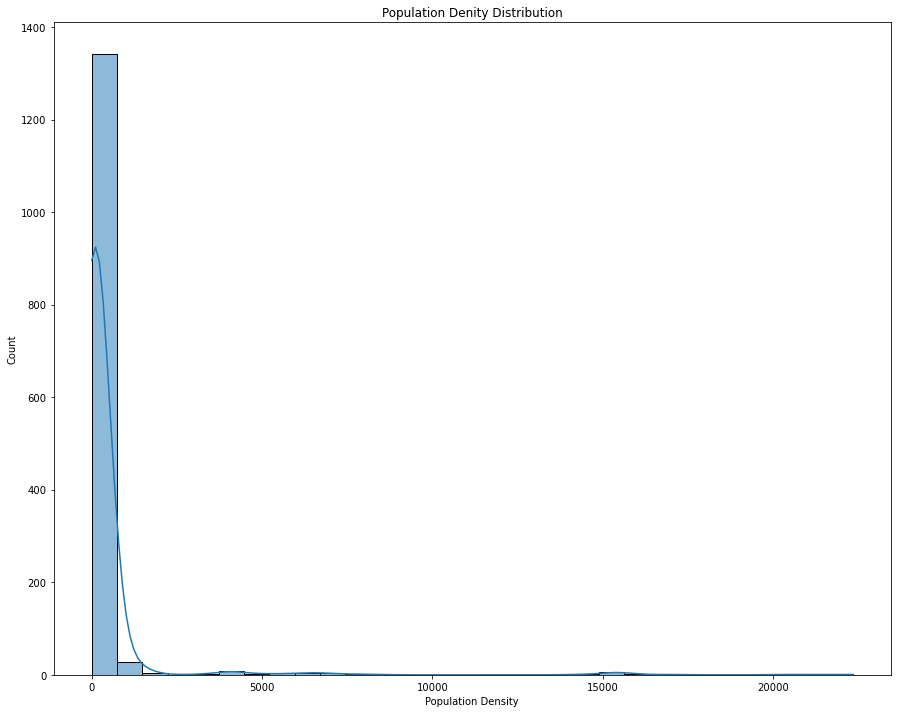

In [19]:
plt.figure(figsize=(15,12))
sns.histplot(data['population_density'], kde=True, bins=30)
plt.title('Population Denity Distribution')
plt.xlabel('Population Density')
plt.show()

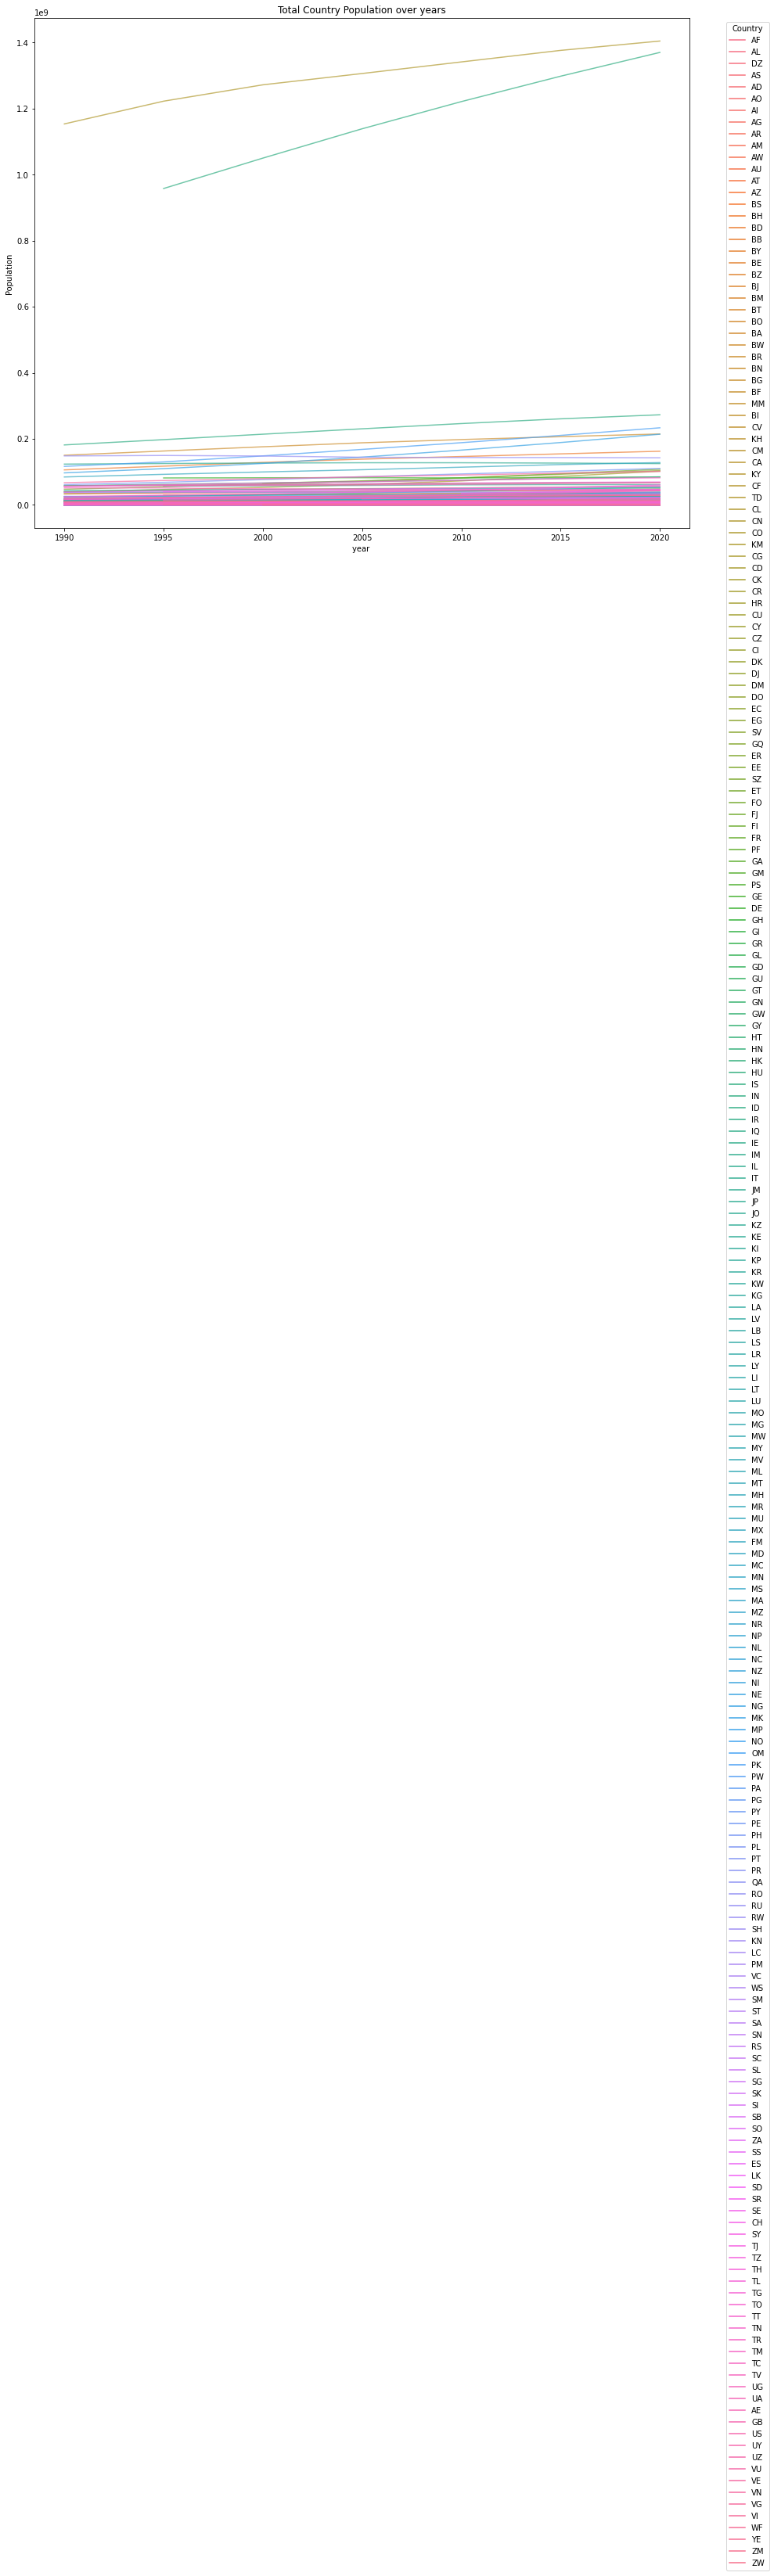

In [20]:
plt.figure(figsize=(15,12))
sns.lineplot(data=data, x='year', y='total_country_population',hue='country_id_alpha',alpha=0.7)
plt.title('Total Country Population over years')
plt.xlabel('year ')
plt.ylabel('Population')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [21]:
data['total_country_population'].nunique()

1412

In [22]:
#heatmap

In [23]:
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']
numerical_features

['year',
 'total_country_population',
 'annual_growth_rate',
 'country_area',
 'population_density',
 'total_fertility_rate',
 'crude_birth_rate',
 'life_expectancy_at_birth',
 'infant_mortality_rate',
 'crude_death_rate',
 'net_migration_rate',
 'migration_flag',
 'total_migrant_population',
 'migrant_male_population',
 'migrant_female_population']

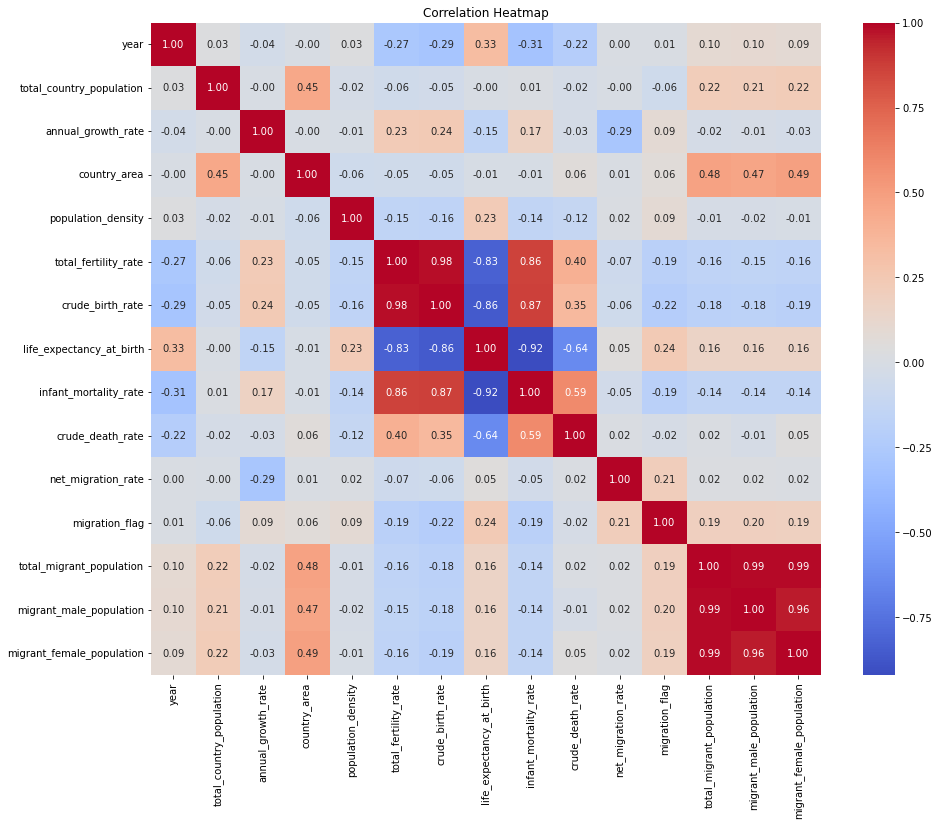

In [24]:
plt.figure(figsize=(15,12))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

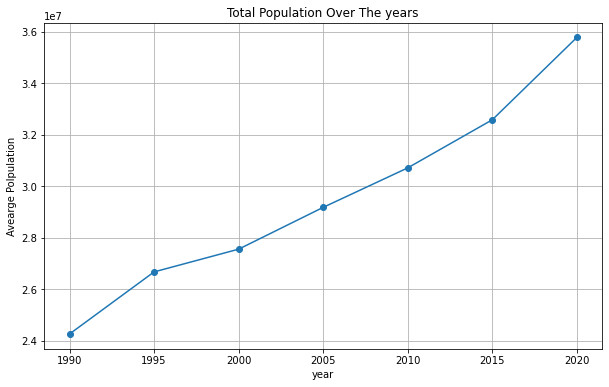

In [25]:
plt.figure(figsize=(10, 6))
data.groupby('year')['total_country_population'].mean().plot(kind='line',marker='o')
plt.title('Total Population Over The years')
plt.ylabel('Avearge Polpulation')
plt.grid(True)
plt.show()

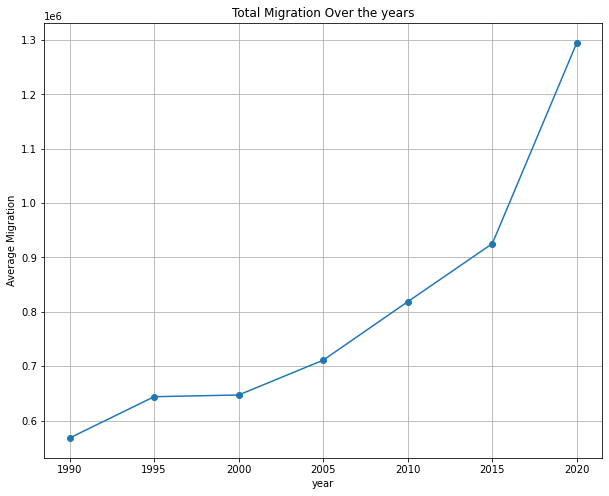

In [26]:
plt.figure(figsize=(10,8))
data.groupby('year')['total_migrant_population'].mean().plot(kind='line', marker='o')
plt.title('Total Migration Over the years')
plt.ylabel('Average Migration')
plt.grid(True)
plt.show()

In [27]:
data[['total_migrant_population']].describe()

,total_migrant_population
count,1.412000e+03
mean,8.155514e+05
std,2.178950e+06
min,1.080000e+02
25%,2.795425e+04
50%,1.563250e+05
75%,6.527125e+05
max,5.063284e+07


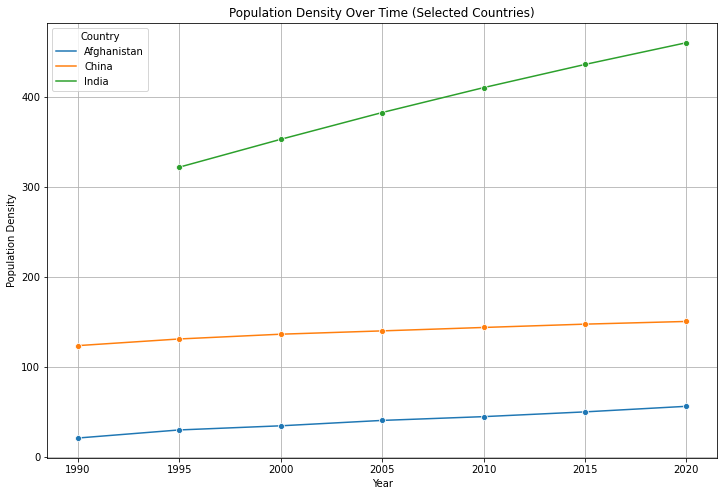

In [28]:
selected_countries = ['Afghanistan', 'India', 'U.S.', 'China']
filtered_data = data[data['country_name'].isin(selected_countries)]

plt.figure(figsize=(12, 8))
sns.lineplot(data=filtered_data, x='year', y='population_density',hue='country_name',  marker='o')
plt.title('Population Density Over Time (Selected Countries)')
plt.xlabel('Year')
plt.ylabel('Population Density')
plt.legend(title='Country')
plt.grid(True)
plt.show()

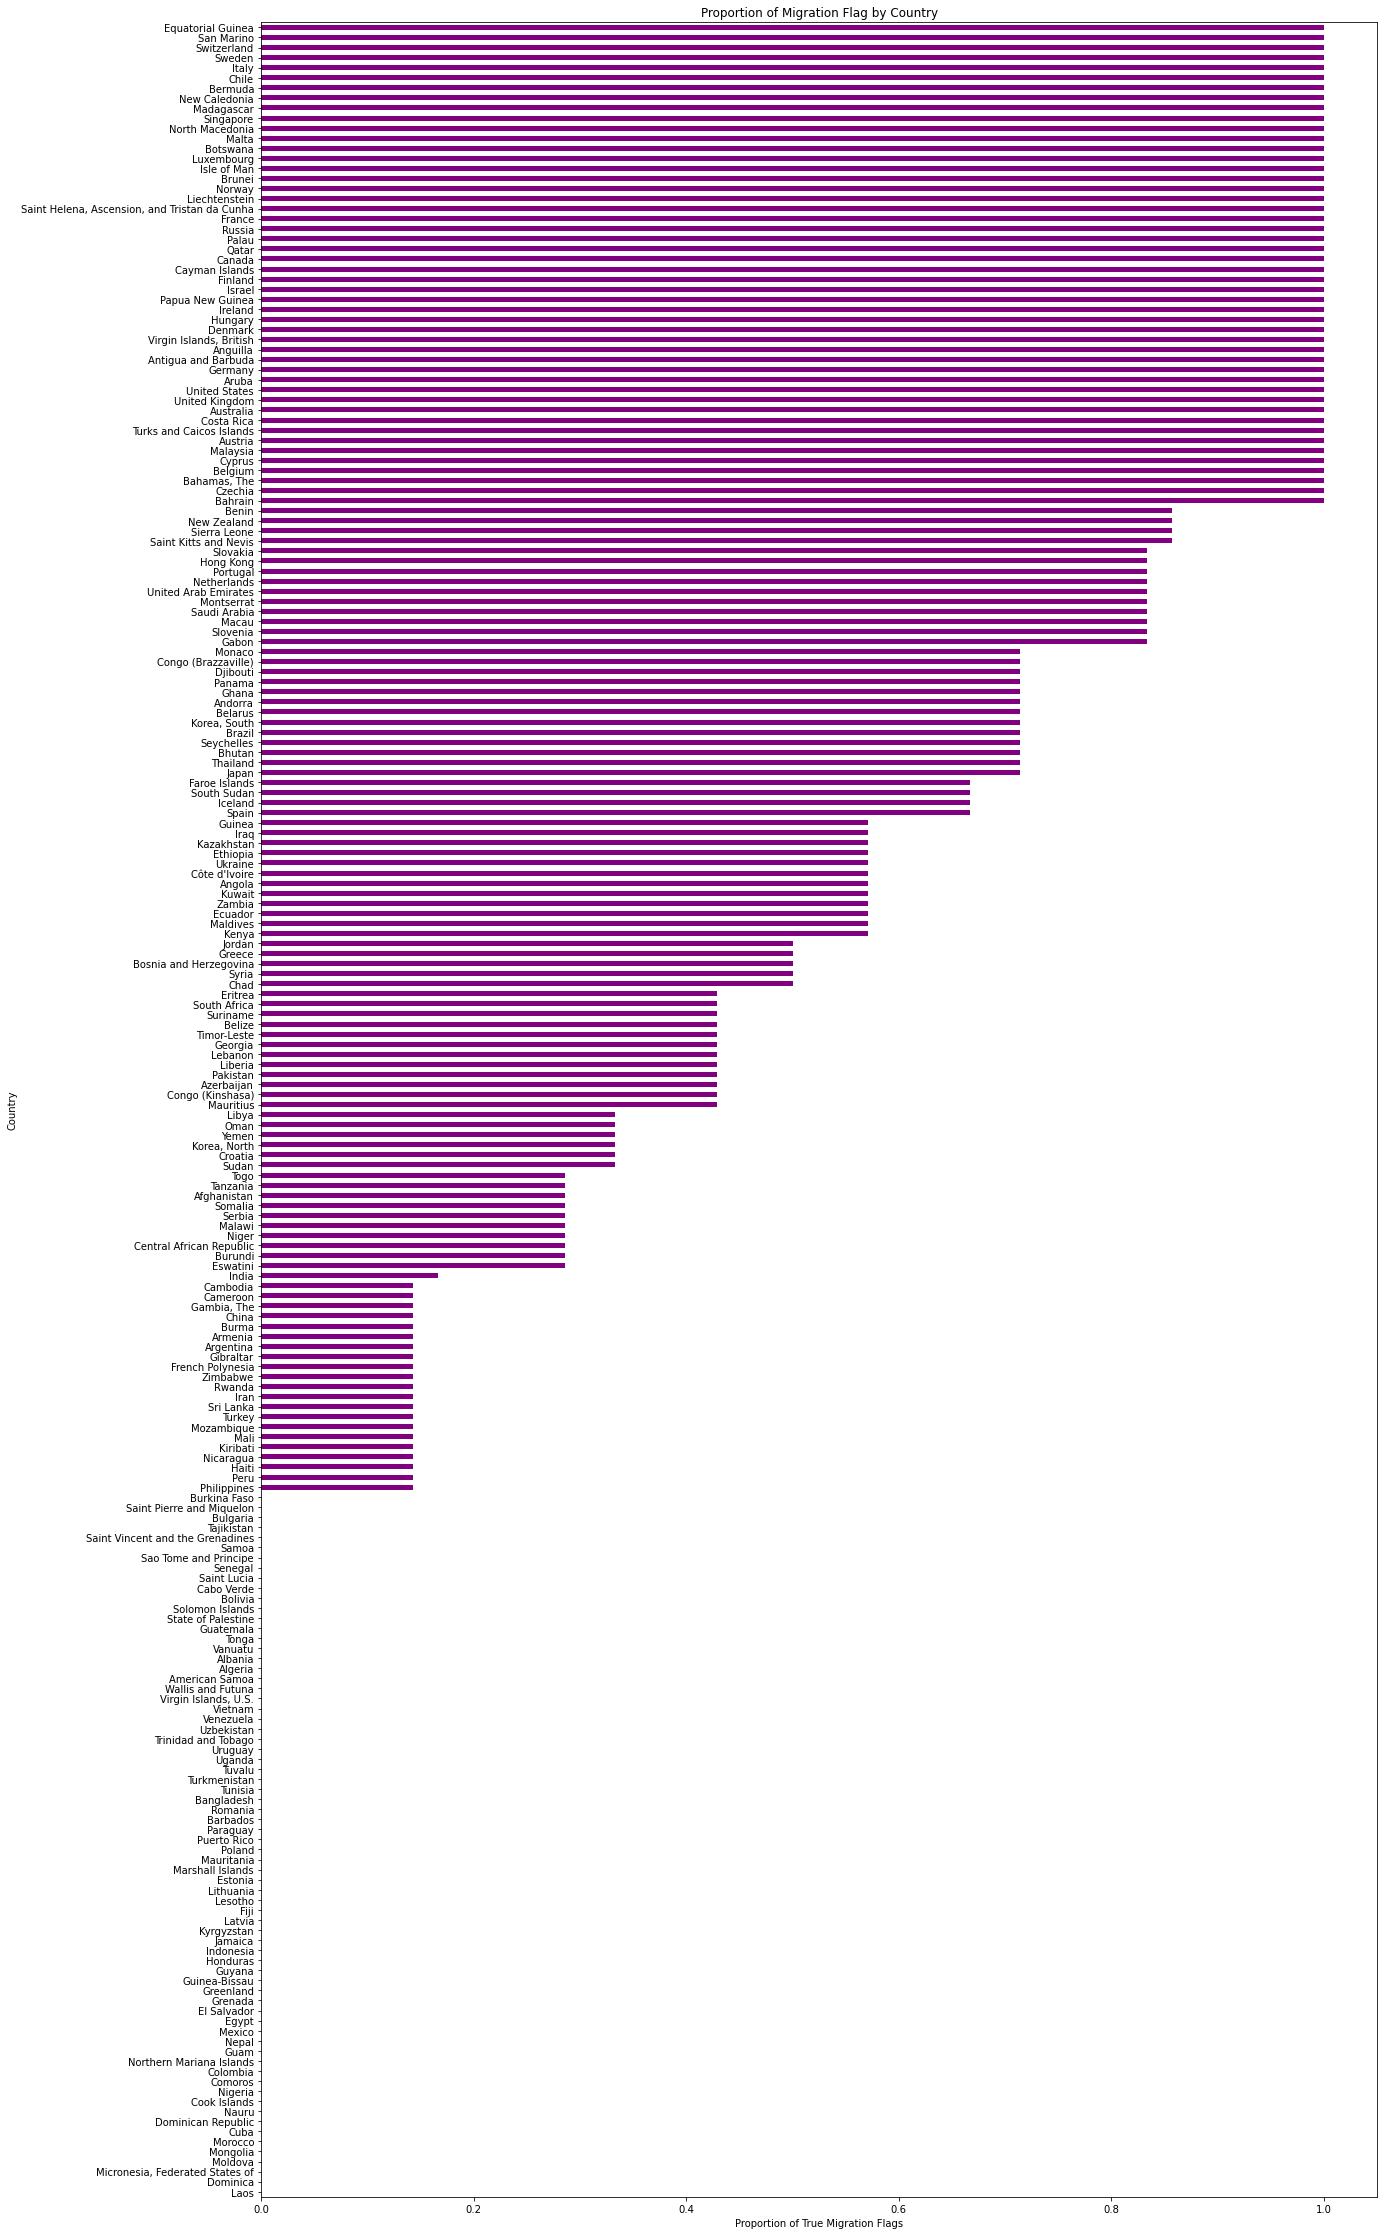

In [29]:
migration_flag_distribution = data.groupby('country_name')['migration_flag'].mean().sort_values()

plt.figure(figsize=(20, 40))
migration_flag_distribution.plot(kind='barh', color='purple')
plt.title('Proportion of Migration Flag by Country')
plt.xlabel('Proportion of True Migration Flags')
plt.ylabel('Country')
plt.show()


In [30]:
X = data[numerical_features].drop('migration_flag', axis=1)
y = data['migration_flag']

In [31]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: migration_flag, dtype: int64

In [33]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape

((1059, 14), (353, 14))

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
y_pred = rf.predict(X_test)

In [37]:
cm = confusion_matrix(y_test, y_pred)

In [38]:
cm

array([[ 95, 101],
       [  0, 157]], dtype=int64)

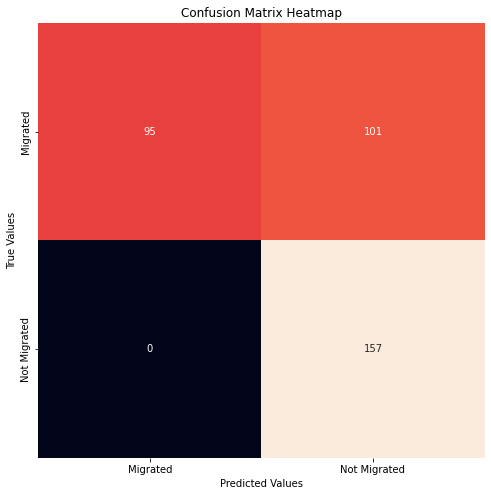

In [39]:
classes = ['Migrated', 'Not Migrated']

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [40]:
accuracy_score(y_test,y_pred)

0.7138810198300283

In [45]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.48      0.65       196\n           1       0.61      1.00      0.76       157\n\n    accuracy                           0.71       353\n   macro avg       0.80      0.74      0.70       353\nweighted avg       0.83      0.71      0.70       353\n'

In [49]:
importances = rf.feature_importances_
sorted(zip(rf.feature_importances_, X.columns), reverse=True)

[(0.699201919431997, 'net_migration_rate'),
 (0.06257734171606097, 'annual_growth_rate'),
 (0.04705983864258453, 'infant_mortality_rate'),
 (0.04032662220747269, 'life_expectancy_at_birth'),
 (0.03531445223835232, 'crude_birth_rate'),
 (0.023082722511219754, 'total_fertility_rate'),
 (0.015590084883784727, 'migrant_male_population'),
 (0.014102292222195879, 'migrant_female_population'),
 (0.013069174995988224, 'total_migrant_population'),
 (0.012633815601030997, 'population_density'),
 (0.012128798783947913, 'total_country_population'),
 (0.011906524218572903, 'crude_death_rate'),
 (0.008383607237493528, 'country_area'),
 (0.004622805309298513, 'year')]

In [42]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [43]:
y_pred_svc = rf.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred_svc)

0.7138810198300283

In [47]:
classification_report(y_test, y_pred_svc)

'              precision    recall  f1-score   support\n\n           0       1.00      0.48      0.65       196\n           1       0.61      1.00      0.76       157\n\n    accuracy                           0.71       353\n   macro avg       0.80      0.74      0.70       353\nweighted avg       0.83      0.71      0.70       353\n'

In [ ]:
im